***Liên kết Google Colab với Google Drive***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Truy cập vào thư mục content của Google Colab***

In [2]:
import os
os.chdir("/content")

In [3]:
#import os
#import glob
#fileList = glob.glob('/content/drive/MyDrive/T*.jpg')
#print("Number of files: ",len(fileList))
    
#for filePath in fileList:
  #try:
    #os.remove(filePath)
  #except:
    #print("Error while deleting file : ", filePath)

***Giải nén file zip từ Google Drive***

In [4]:
!unzip /content/drive/MyDrive/APP-CQ18/plant-pathology-2020-fgvc7.zip

Archive:  /content/drive/MyDrive/APP-CQ18/plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: im

***Nhập vào các thư viện cần thiết***

In [5]:
import glob 
import cv2 
from google.colab.patches import cv2_imshow

import pandas as pd
import matplotlib.pyplot as plt

***Lưu các hình ảnh train và test vào biến mới***

In [6]:
test_dir = glob.glob('/content/images/Test*.jpg')  
train_dir = glob.glob('/content/images/Train*.jpg')  

In [7]:
train_dir = sorted(train_dir, key = lambda x: (len(x), x))
test_dir = sorted(test_dir, key = lambda x: (len(x), x))

In [8]:
test = [] 
train = [] 
scale_percent = 0.5

for f in test_dir: 
  img = cv2.imread(f)
  width = int(img.shape[1] * scale_percent)
  height = int(img.shape[0] * scale_percent)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  test.append(resized) 

for f in train_dir: 
  img = cv2.imread(f)
  width = int(img.shape[1] * scale_percent)
  height = int(img.shape[0] * scale_percent)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  train.append(resized) 

In [9]:
len(test), len(train)

(1821, 1821)

In [10]:
#fig, axes = plt.subplots(5,1, figsize = (10,25), sharex=True, sharey=True)
#for i in range(5):
    #axes[i].imshow(Image.open("images/Train_%d.jpg" % i))

In [11]:
#fig, axes2 = plt.subplots(5,1, figsize = (10,25), sharex=True, sharey=True)
#for i in range(5):
    #axes2[i].imshow(Image.open("images/Test_%d.jpg" % i))

***Khám phá dữ liệu file csv***

In [12]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')
sam_sub_csv = pd.read_csv('sample_submission.csv')

In [13]:
train_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0


In [14]:
test_csv.head(3)

,image_id
0,Test_0
1,Test_1
2,Test_2


In [15]:
sam_sub_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25


In [16]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


- Dữ liệu huấn luyện gồm có 1821 hình ảnh và nhãn của chúng. 
- Không có dữ liệu rỗng
- Ý nghĩa các cột:
    - `image_id`: tên file hình ảnh
    - `healthy`: 1 nếu cây khỏe mạnh, 0 nếu ngược lại
    - `multiple_diseases`: 1 nếu cây có nhiều bệnh cùng lúc, 0 nếu ngược lại
    - `rust`: 1 nếu cây bị bệnh rust, 0 nếu ngược lại 
    - `scab`: 1 nếu cây bị bệnh scab, 0 nếu ngược lại

In [17]:
train_csv = train_csv.drop('image_id', axis = 1)
train_csv.value_counts()

healthy  multiple_diseases  rust  scab
0        0                  1     0       622
                            0     1       592
1        0                  0     0       516
0        1                  0     0        91
dtype: int64

(array([0]), <a list of 1 Text major ticklabel objects>)

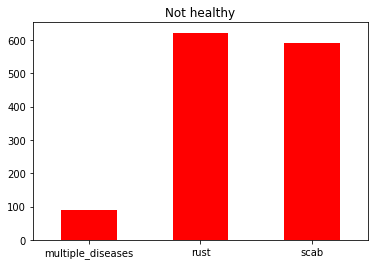

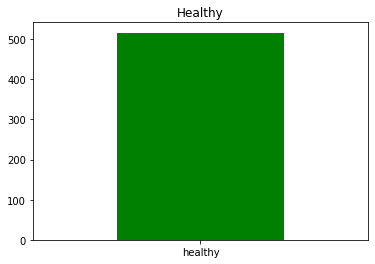

In [18]:
fig, axes = plt.subplots(1,1)

not_healthy = train_csv.loc[(train_csv.healthy == 0), ['multiple_diseases', 'rust', 'scab']]
pd.Series(not_healthy.sum()).plot.bar(title = 'Not healthy', color = 'red')
plt.xticks(rotation = 0)

fig, axes = plt.subplots(1,1)

healthy = train_csv.loc[(train_csv.healthy == 1), ['healthy']]
pd.Series(healthy.sum()).plot.bar(title = 'Healthy', color = 'green')
plt.xticks(rotation = 0)

- Mỗi hình ảnh chỉ thuộc về một loại duy nhất trong tập {healthy, multiple_diseases, rust, scab}
- Lượng hình ảnh của mỗi loại trong {rust, scab, healthy} khá tương đồng, tuy nhiên lượng hình ảnh của multiple_diseases ít hơn hẳn 

***Chuẩn bị dữ liệu file csv***

In [19]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')
sam_sub_csv = pd.read_csv('sample_submission.csv')

In [20]:
train_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0


In [21]:
test_csv.head(3)

,image_id
0,Test_0
1,Test_1
2,Test_2


In [22]:
sam_sub_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25


In [23]:
train_label = train_csv.melt(['image_id'])
train_label.drop(index=train_label[train_label['value'] == 0].index, inplace=True)
train_label.head(3)

,image_id,variable,value
2,Train_2,healthy,1
4,Train_4,healthy,1
5,Train_5,healthy,1


In [24]:
train_csv = train_csv.merge(train_label, on='image_id')
train_csv.drop(columns=['value'], inplace=True)
train_csv.rename(columns={'variable': 'class'}, inplace=True)
train_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab,class
0,Train_0,0,0,0,1,scab
1,Train_1,0,1,0,0,multiple_diseases
2,Train_2,1,0,0,0,healthy


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_csv['label'] = le.fit_transform(train_csv['class'])
train_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab,class,label
0,Train_0,0,0,0,1,scab,3
1,Train_1,0,1,0,0,multiple_diseases,1
2,Train_2,1,0,0,0,healthy,0


In [26]:
train_csv['image'] = train
train_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab,class,label,image
0,Train_0,0,0,0,1,scab,3,"[[[13, 51, 33], [13, 51, 33], [14, 52, 34], [1..."
1,Train_1,0,1,0,0,multiple_diseases,1,"[[[215, 215, 203], [217, 217, 205], [220, 220,..."
2,Train_2,1,0,0,0,healthy,0,"[[[109, 124, 120], [110, 126, 122], [112, 126,..."


In [27]:
test_csv['image'] = test
test_csv.head(3)

,image_id,image
0,Test_0,"[[[54, 148, 101], [53, 148, 98], [51, 146, 96]..."
1,Test_1,"[[[26, 118, 71], [24, 116, 69], [26, 116, 70],..."
2,Test_2,"[[[66, 69, 84], [66, 69, 84], [66, 68, 84], [6..."


***Mô hình hóa dữ liệu với XGBoost***

In [32]:
#import xgboost as xgb

#param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic'}
#model = xgb.train(param, train_csv, 5)